In [2]:
# identify hand written digits

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
#explore what dataset contains
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0] #64 = 8x8 picture

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

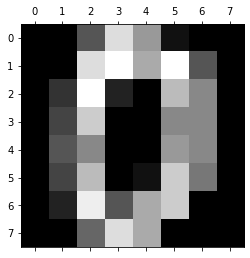

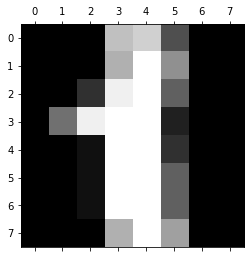

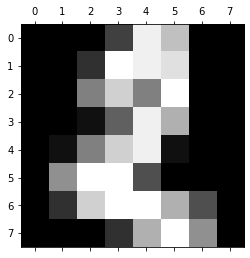

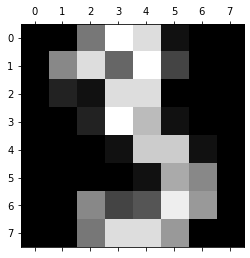

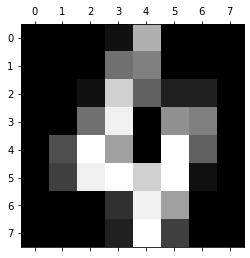

In [7]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [8]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [11]:
len(X_train)

1437

In [12]:
len(X_test)

360

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)
#X_train has the picture, y_train has the result telling what digit it is

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model.score(X_test, y_test)
#calculate y_pred from X_test against the real value y_test

0.9777777777777777

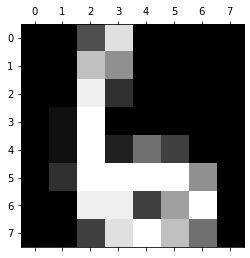

In [16]:
plt.matshow(digits.images[67])

In [17]:
digits.target[67]

6

In [18]:
model.predict([digits.data[67]])

array([6])

In [19]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [20]:
#confusion matric

y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  1,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

Text(69.0, 0.5, 'Truth')

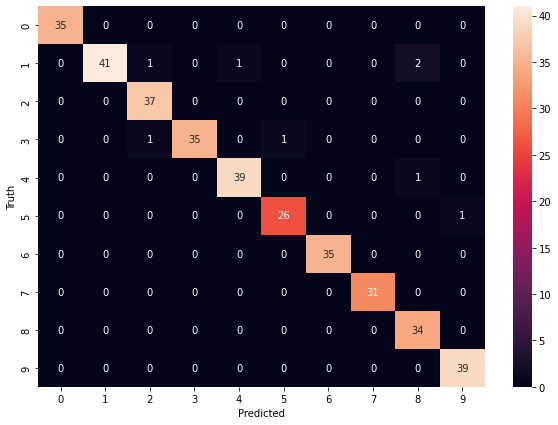

In [22]:
#visualize confusion matrix using seaborn

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')